In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_excel('Diabetes_Data.xlsx')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [17]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
corr_matrix = X.corr()
corr_matrix

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


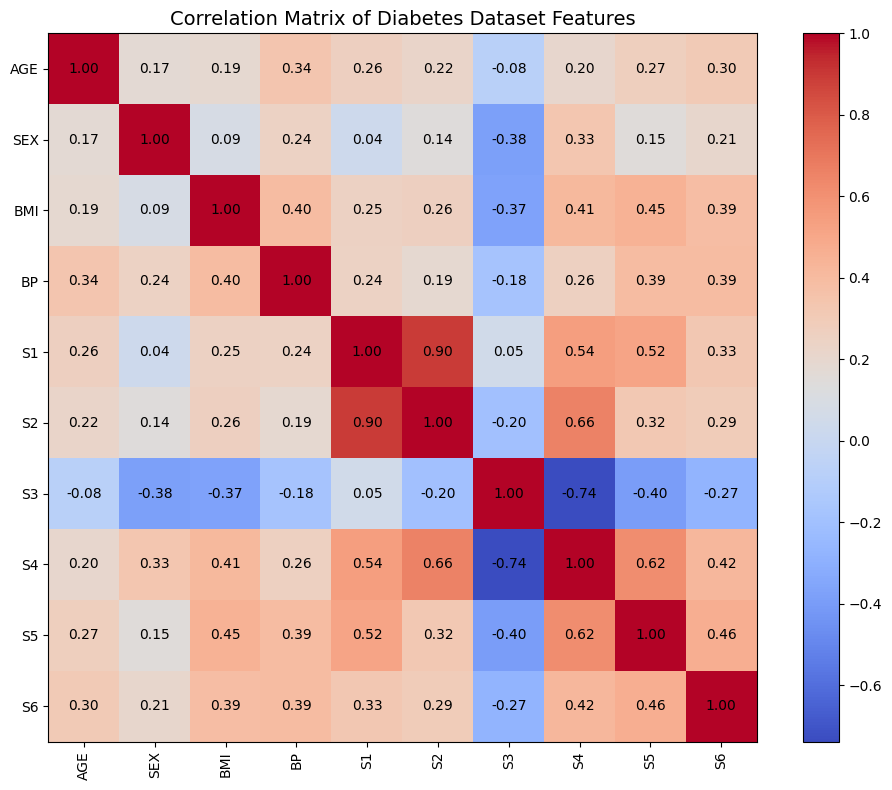

In [11]:
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.yticks(range(len(X.columns)), X.columns)

for i in range(len(X.columns)):
    for j in range(len(X.columns)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')    
        
plt.title('Correlation Matrix of Diabetes Dataset Features', fontsize=14)
plt.tight_layout()
plt.show()

In [26]:
X_with_const = sm.add_constant(X)

model = sm.OLS(y, X_with_const)
results = model.fit()

print("A. Multivariate Linear model created with:")
print(f"   .10 variables: {list(X.columns)}")
print(f"   .constant (intercept) included")
print(f"   .Model: y = {results.params['const']:.2f} +", end=' ')
for i, col in enumerate(X.columns, 1):

    print(f"{results.params[col]:.2f}*{col}", end=' ')
    if i < len(X.columns):
        print("+", end=' ')
print()

A. Multivariate Linear model created with:
   .10 variables: ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
   .constant (intercept) included
   .Model: y = -334.57 + -0.04*AGE + -22.86*SEX + 5.60*BMI + 1.12*BP + -1.09*S1 + 0.75*S2 + 0.37*S3 + 6.53*S4 + 68.48*S5 + 0.28*S6 


In [27]:
print("=" *60)
print("Model Summary:")
print("=" *60)

y_pred = results.predict(X_with_const)
mse = mean_squared_error(y, y_pred)

print(f" 1. Mean Squared Error (MSE): {mse:.2f}")
print(f" 2. R-squared: {results.rsquared:.4f}")
print(f" 3. Adjusted R-squared: {results.rsquared_adj:.4f}")

print("\nInterpretation of Coefficients:")
print("=" *60)
print(f" >MSE = {mse:.2f} indicates the average squared difference between the PREDICTED and ACTUAL values of the target variable.")
print(f" >R^2 = {results.rsquared:.4f} suggests that approximately {results.rsquared*100:.2f}% of the variance in the target variable can be explained by the predictor variables in the model.")
print(f" >Adjusted R^2 = {results.rsquared_adj:.4f} accounts for the number of predictors in the model, providing a more accurate measure of model performance when multiple predictors are involved.")

Model Summary:
 1. Mean Squared Error (MSE): 2859.70
 2. R-squared: 0.5177
 3. Adjusted R-squared: 0.5066

Interpretation of Coefficients:
 >MSE = 2859.70 indicates the average squared difference between the PREDICTED and ACTUAL values of the target variable.
 >R^2 = 0.5177 suggests that approximately 51.77% of the variance in the target variable can be explained by the predictor variables in the model.
 >Adjusted R^2 = 0.5066 accounts for the number of predictors in the model, providing a more accurate measure of model performance when multiple predictors are involved.


In [28]:
print("=" *70)
print("ARE ALL VARIABLES SIGNIFICANT?")
print("=" *70)

print("\nSIGNIFICANCE TEST (α = 0.05):")
print("_" *60)
print(f"{'Variable':<6} {'Coefficient':<12} {'p-value':>12} {'Significant?':<12}")
print("-" *60)

significant_count = 0
for col in X.columns:
    p_value = results.pvalues[col]
    coeff = results.params[col]
    significant = "Yes" if p_value < 0.05 else "No"
    if significant == "Yes":
        significant_count += 1
    print(f"{col:<6} {coeff:<12.4f} {p_value:>12.4f} {significant:<12}")
print("-" *60)
significant_count = 0
for col in X.columns:
    p_val = results.pvalues[col]
    if p_val < 0.05:
        significant_count += 1
        sig_mark = "✔ Yes"
    else:
        sig_mark = "✘ No"
    print(f"{col:<6} {results.params[col]:<12.4f} {p_val:>12.4f} {sig_mark:<12}")

    print(f"{'const':<6} {results.params['const']:<12.4f} {results.pvalues['const']:>12.4f}")
print("-" *60)
print(f"\nANSWER: No, NOT all variables are significant at α = 0.05.")
print(f"\nSUMMMARY:")
print(f" out of Total variable tested: {len(X.columns)}")
print(f" Significant variables (p < 0.05): {significant_count}")
print(f" Insignificant variables (p >= 0.05): {len(X.columns) - significant_count}")


print(f"\nSIGNIFICANT VARIABLES (P < 0.05):")
for col in X.columns:
    if results.pvalues[col] < 0.05:
        print(f" • {col}: β = {results.params[col]:.4f}, p = {results.pvalues[col]:.4f}")

print("\nINSIGNIFICANT VARIABLES (P >= 0.05):")
for col in X.columns:
    if results.pvalues[col] >= 0.05:
        print(f" • {col}: β = {results.params[col]:.4f}, p = {results.pvalues[col]:.4f}")


ARE ALL VARIABLES SIGNIFICANT?

SIGNIFICANCE TEST (α = 0.05):
____________________________________________________________
Variable Coefficient       p-value Significant?
------------------------------------------------------------
AGE    -0.0364            0.8670 No          
SEX    -22.8596           0.0001 Yes         
BMI    5.6030             0.0000 Yes         
BP     1.1168             0.0000 Yes         
S1     -1.0900            0.0579 No          
S2     0.7465             0.1604 No          
S3     0.3720             0.6347 No          
S4     6.5338             0.2735 No          
S5     68.4831            0.0000 Yes         
S6     0.2801             0.3060 No          
------------------------------------------------------------
AGE    -0.0364            0.8670 ✘ No        
const  -334.5671          0.0000
SEX    -22.8596           0.0001 ✔ Yes       
const  -334.5671          0.0000
BMI    5.6030             0.0000 ✔ Yes       
const  -334.5671          0.0000
BP     1.1

In [31]:
def forward_regression(X, y, alpha=0.05):
    selected_vars = []
    remaining_vars = list(X.columns)
    while remaining_vars:
        p_values = {}
        for var in remaining_vars:
            model_vars = selected_vars + [var]
            X_model = sm.add_constant(X[model_vars])
            model = sm.OLS(y, X_model).fit()
            p_values[var] = model.pvalues[var]
        min_p_value = min(p_values.values())
        if min_p_value < alpha:
            best_var = min(p_values, key=p_values.get)
            selected_vars.append(best_var)
            remaining_vars.remove(best_var)
        else:
            break
        final_model = sm.OLS(y, sm.add_constant(X[selected_vars])).fit()
    return final_model, selected_vars

model, selected_features = forward_regression(X, y)
print("selected variables:", selected_features)
print(model.summary())
    

selected variables: ['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     76.95
Date:                Sun, 11 Jan 2026   Prob (F-statistic):           3.01e-65
Time:                        13:20:03   Log-Likelihood:                -2387.3
No. Observations:                 442   AIC:                             4789.
Df Residuals:                     435   BIC:                             4817.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [32]:
y_pred = model.predict(sm.add_constant(X[selected_features]))
mse = mean_squared_error(y, y_pred)
r2 = model.rsquared

print(f"Mean Squared Error (MSE) after Forward Selection: {mse:.2f}")
print(f"R-squared after Forward Selection: {r2:.4f}")

Mean Squared Error (MSE) after Forward Selection: 2876.68
R-squared after Forward Selection: 0.5149
